#IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train , Y_train = train['features'], train['labels']

In [4]:
X_test, Y_test = test['features'], test['labels']

In [5]:
X_valid, Y_valid = valid['features'], valid['labels']

# PERFORM IMAGES VISUALIZATION

25

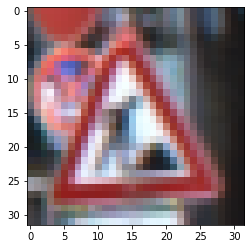

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
Y_train[i]

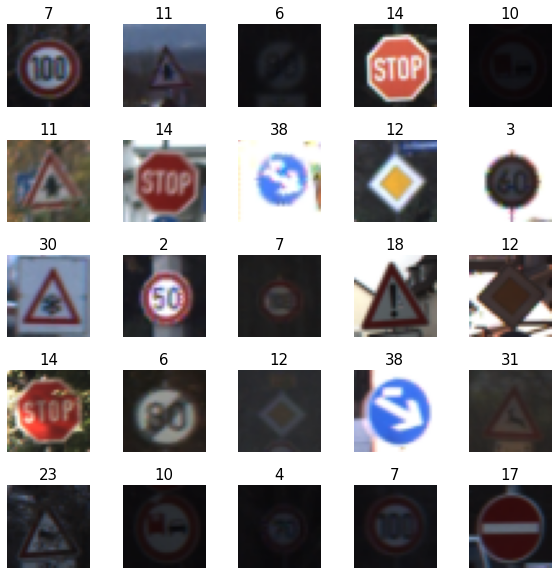

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index], fontsize = 15)
    axes[i].axis('off')
    # Select a random number
    
    # read and display an image with the selected index    
plt.subplots_adjust(hspace = 0.4)

        

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [10]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis =3, keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128
X_train_gray_norm

array([[[[-0.83854167],
         [-0.83333333],
         [-0.83854167],
         ...,
         [-0.87239583],
         [-0.85677083],
         [-0.86979167]],

        [[-0.84114583],
         [-0.84375   ],
         [-0.84375   ],
         ...,
         [-0.8515625 ],
         [-0.86458333],
         [-0.8671875 ]],

        [[-0.84114583],
         [-0.8515625 ],
         [-0.8515625 ],
         ...,
         [-0.8671875 ],
         [-0.87239583],
         [-0.88020833]],

        ...,

        [[-0.83072917],
         [-0.84635417],
         [-0.83072917],
         ...,
         [-0.86458333],
         [-0.87239583],
         [-0.87760417]],

        [[-0.8515625 ],
         [-0.84635417],
         [-0.83854167],
         ...,
         [-0.875     ],
         [-0.8828125 ],
         [-0.88802083]],

        [[-0.84375   ],
         [-0.828125  ],
         [-0.83072917],
         ...,
         [-0.87760417],
         [-0.8671875 ],
         [-0.86197917]]],


       [[[ 0.21354167],


In [16]:
X_test_gray = np.sum(X_test/3, axis =3, keepdims = True)
X_test_norm = (X_test_gray - 128)/128
X_test_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


In [17]:
X_valid_gray = np.sum(X_valid/3, axis =3, keepdims = True)
X_valid_norm = (X_valid_gray - 128)/128
X_valid_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


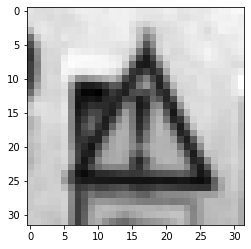

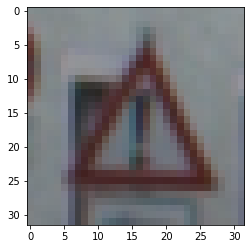

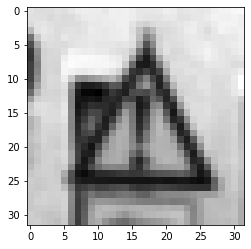

In [18]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [20]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()
CNN.add(layers.Conv2D(6,(5,5),activation ='relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16,(5,5), activation='relu'))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Flatten())
CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

# COMPILE AND TRAIN DEEP CNN MODEL

In [21]:
CNN.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [23]:
history = CNN.fit(X_train_gray_norm, Y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_valid_norm, Y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 23s 673us/sample - loss: 3.2686 - accuracy: 0.1493 - val_loss: 2.9543 - val_accuracy: 0.2533
Epoch 2/5
34799/34799 [==============================] - 23s 658us/sample - loss: 2.1500 - accuracy: 0.4131 - val_loss: 1.8873 - val_accuracy: 0.4512
Epoch 3/5
34799/34799 [==============================] - 22s 642us/sample - loss: 1.4861 - accuracy: 0.5684 - val_loss: 1.3576 - val_accuracy: 0.6091
Epoch 4/5
34799/34799 [==============================] - 23s 653us/sample - loss: 1.1507 - accuracy: 0.6587 - val_loss: 1.1512 - val_accuracy: 0.6601
Epoch 5/5
34799/34799 [==============================] - 23s 663us/sample - loss: 0.9266 - accuracy: 0.7240 - val_loss: 0.9306 - val_accuracy: 0.7211


# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [24]:
score = CNN.evaluate(X_test_norm, Y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 384us/sample - loss: 1.1758 - accuracy: 0.7027
Test Accuracy: 0.7026920318603516


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

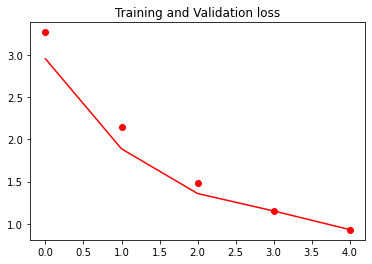

In [27]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation loss')

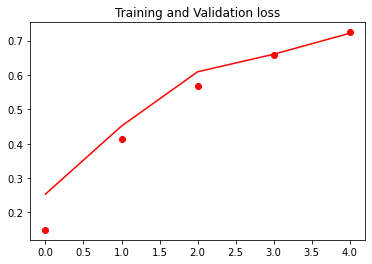

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training loss')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

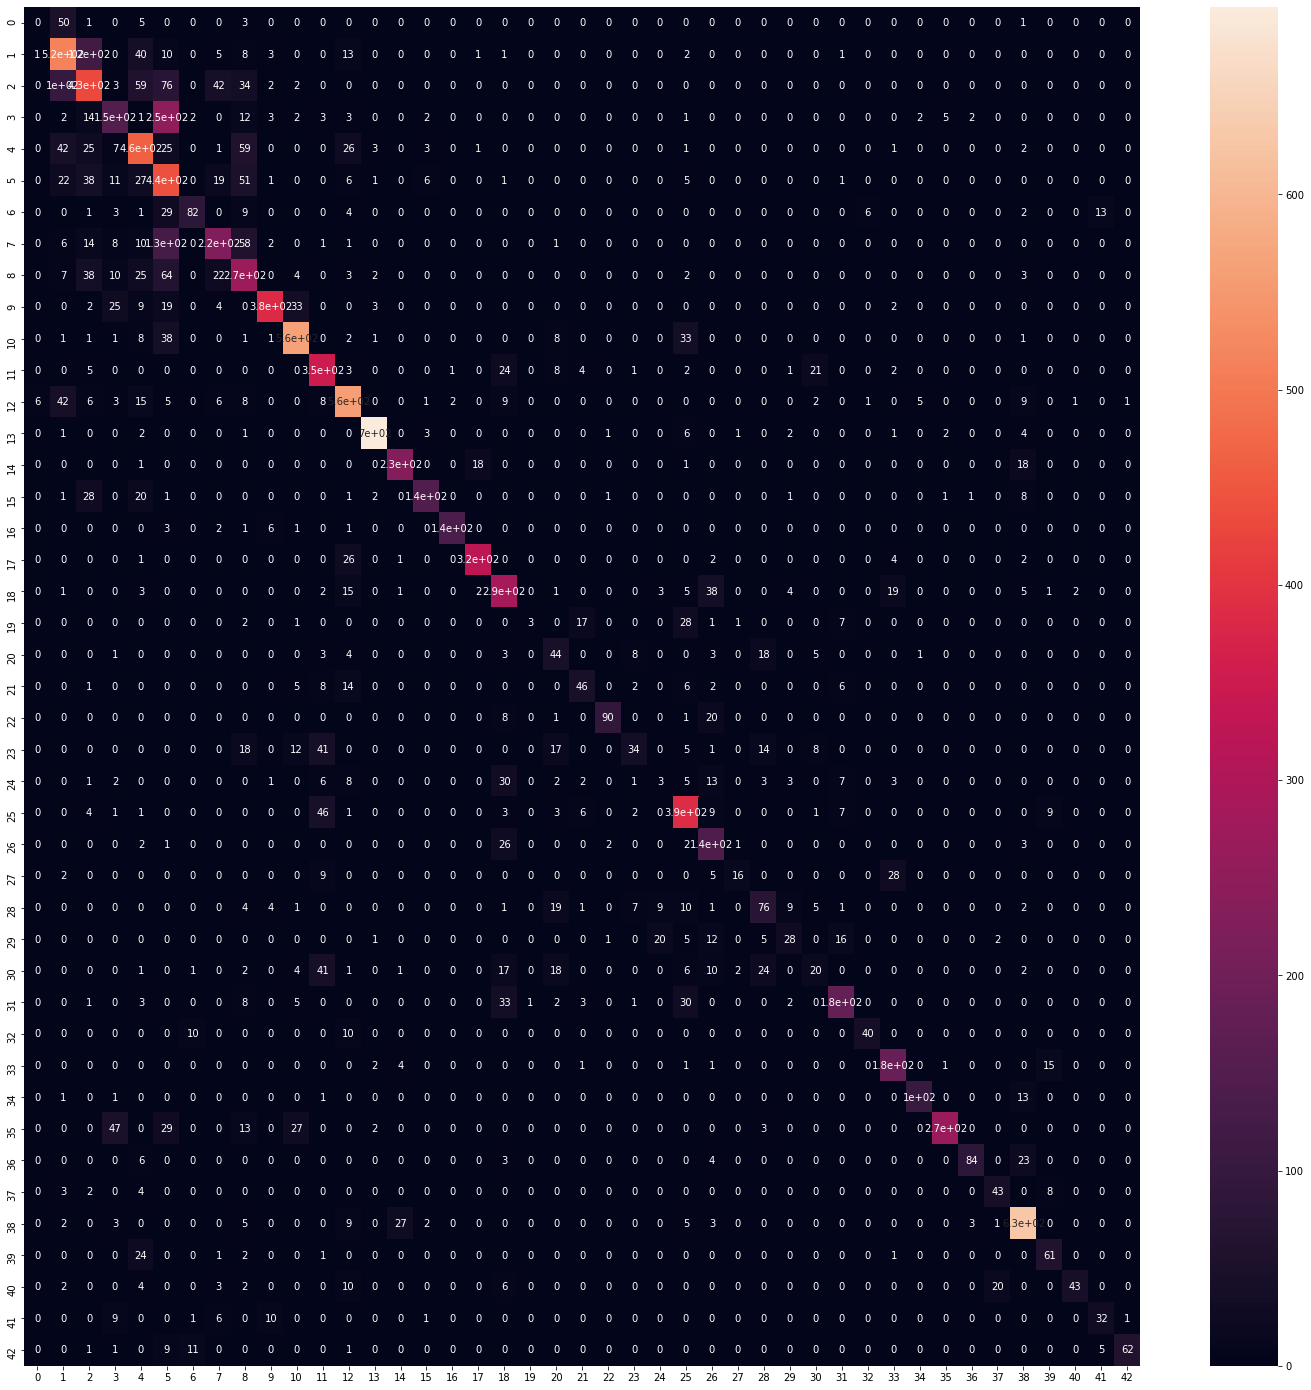

In [30]:
predicted_classes = CNN.predict_classes(X_test_norm)
y_true = Y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

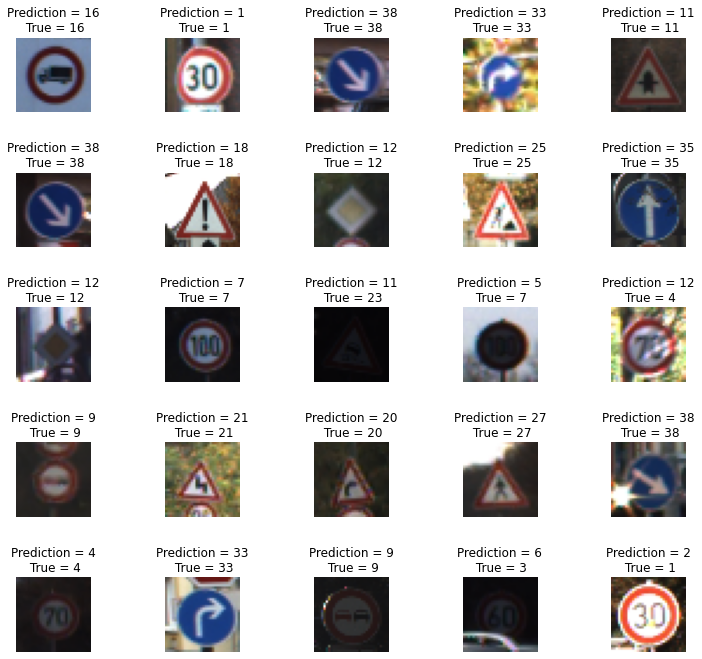

In [31]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    